<a href="https://colab.research.google.com/github/SoumitPY/Final_Year_Project/blob/master/FY_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import glob
import os
import keras
from sklearn import preprocessing
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
import pandas as pd
import numpy as np
import h5py
import cv2
import matplotlib.pyplot as plt

Using TensorFlow backend.


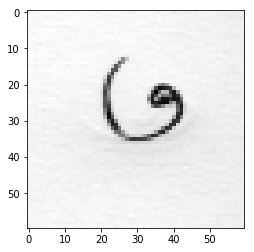

In [0]:
im_path = '/content/drive/My Drive/training-a/a00141.png'
img = cv2.imread(im_path,cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (60, 60), interpolation=cv2.INTER_AREA)
#img = img / 255
#img = np.expand_dims(img,axis=2)
#print(img.shape)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img,cmap='gray')

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

In [0]:
images_train_path = '/content/drive/My Drive/training-a/*.png'
hdf5_path = '/content/drive/My Drive/training-a.h5' 
train_addrs = glob.glob(images_train_path)

In [0]:
def get_key(path):
    # seperates the key of an image from the filepath
    key=path.split(sep=os.sep)[-1]
    return key
df = pd.read_csv('/content/drive/My Drive/training-a.csv')
df = df.set_index('filename')
y_label=[df.loc[get_key(path)]['digit'] for path in  train_addrs]

In [0]:
#data_order = 'tf'
hdf5_file = h5py.File(hdf5_path, mode='w')
hdf5_file.create_dataset("train_labels",(len(train_addrs),), np.int8)
hdf5_file["train_labels"][...] = y_label

In [0]:
train_shape = (len(train_addrs), 60, 60, 1)
hdf5_file.create_dataset("train_img", train_shape, np.int8)

<HDF5 dataset "train_img": shape (19702, 60, 60, 1), type "|i1">

In [0]:
for i in range(len(train_addrs)):
    # print how many images are saved every 1000 images
    if i % 1000 == 0 and i > 1:
        print('Train data: {}/{}'.format(i, len(train_addrs)))
    # read an image and resize to (60, 60)
    addr = train_addrs[i]
    img = cv2.imread(addr,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (60, 60), interpolation=cv2.INTER_AREA)
    img = np.expand_dims(img,axis=2)
    hdf5_file["train_img"][i, ...] = img[None]
hdf5_file.close()

In [0]:
def load_dataset():
  train_dataset = h5py.File('/content/drive/My Drive/training-a.h5',"r")
  train_set_x_orig = np.array(train_dataset["train_img"][:])
  train_set_y_orig = np.array(train_dataset["train_labels"][:])
  return train_set_x_orig, train_set_y_orig

In [0]:
X_train_orig, Y_train_orig = load_dataset()

In [0]:
Y_train = to_categorical(Y_train_orig)

In [0]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_train,Y_train,test_size=0.01)

In [0]:
input_shape = (60,60,1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_Train,Y_Train,epochs=10,batch_size=128)